In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

In [7]:
nullities = pd.read_csv('nullities.csv')
nullities.head(2)

,mod,n,m,nullity
0,2,1,1,0
1,2,1,2,1


In [35]:
def plot_results_for_mod(n):
    R = np.zeros((16, 16))
    for _, r in nullities.query('mod == {}'.format(n)).iterrows():
        R[r.n-1][r.m-1] = r['nullity']
    plt.title(r'nullity($A$ % {})'.format(n), fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    plt.imshow(R, interpolation='none', vmin=0, vmax=10)
    plt.colorbar()

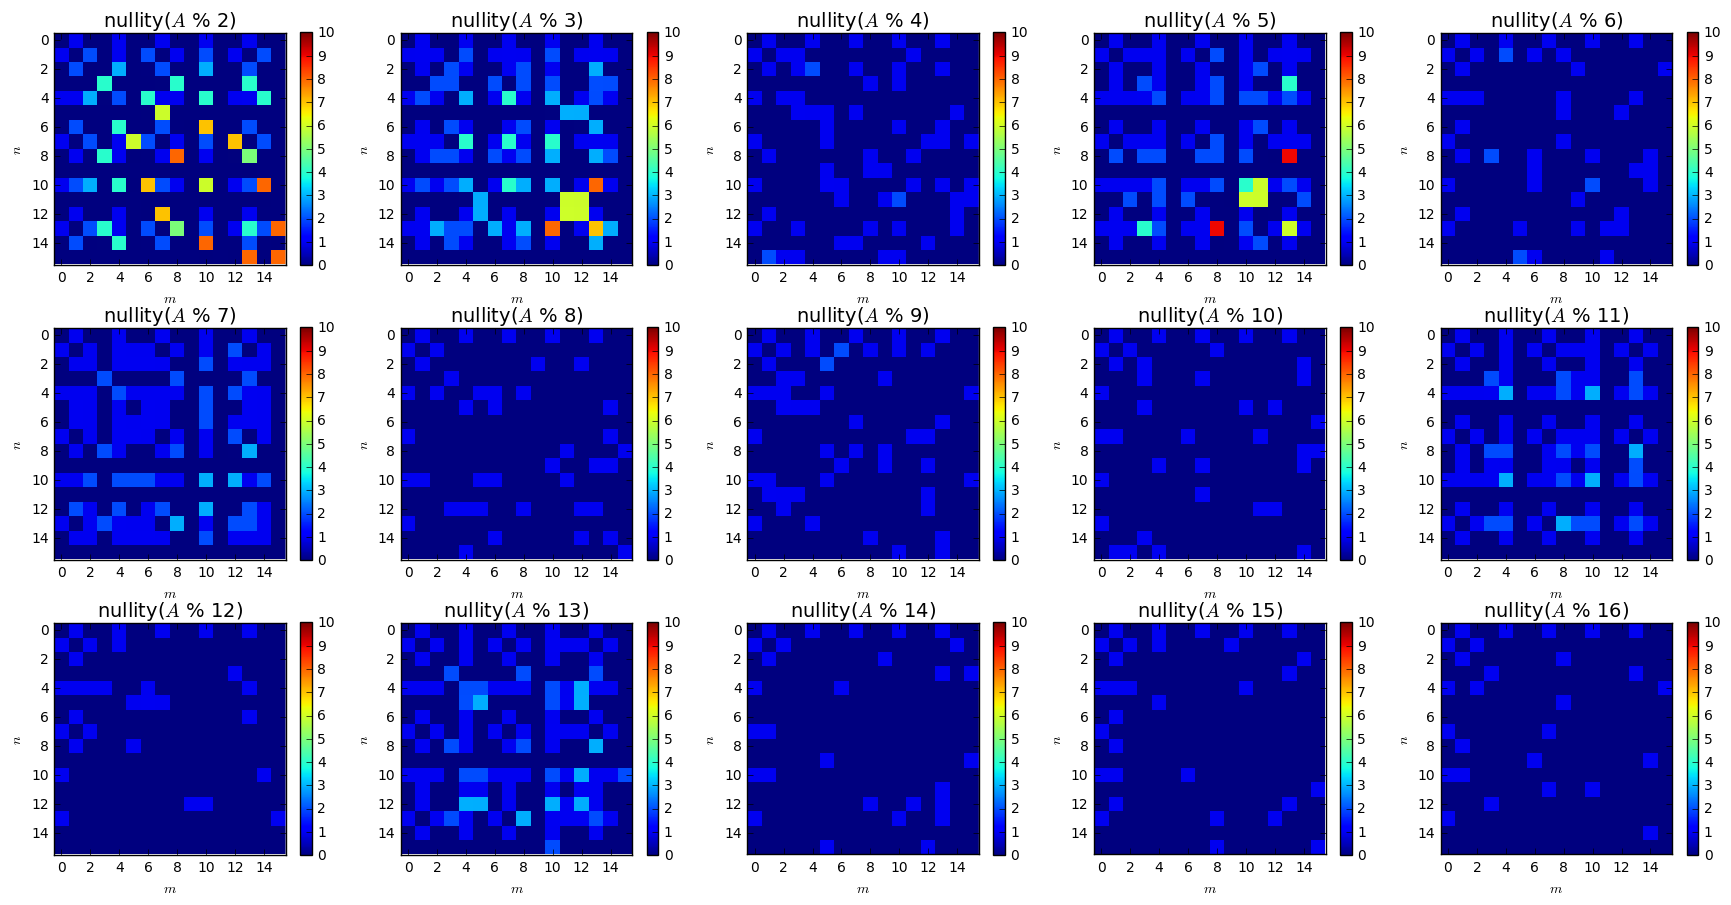

In [36]:
with figure_grid(3, 5, rowwidth=17.5) as grid:
    for i in range(2, 17):
        grid.next_subplot()
        plot_results_for_mod(i)